
--- Bell State Simulation Results ---
Counts: {'11': 488, '00': 536}
Backend: aer_simulator
Total time taken: 0.004321575164794922 seconds

--- GHZ State Simulation Results ---
Counts: {'000': 533, '111': 491}
Backend: aer_simulator
Total time taken: 0.004109859466552734 seconds


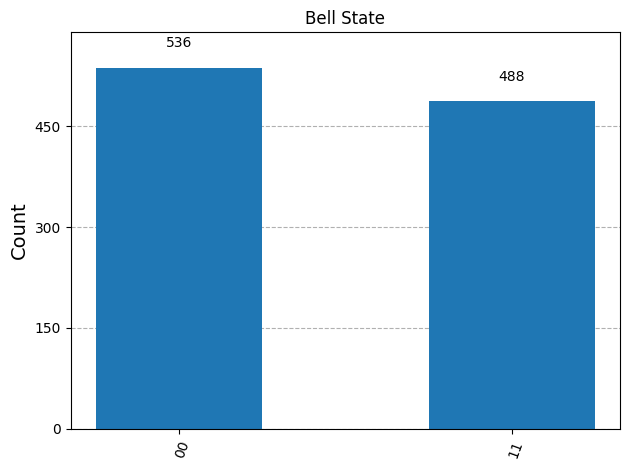

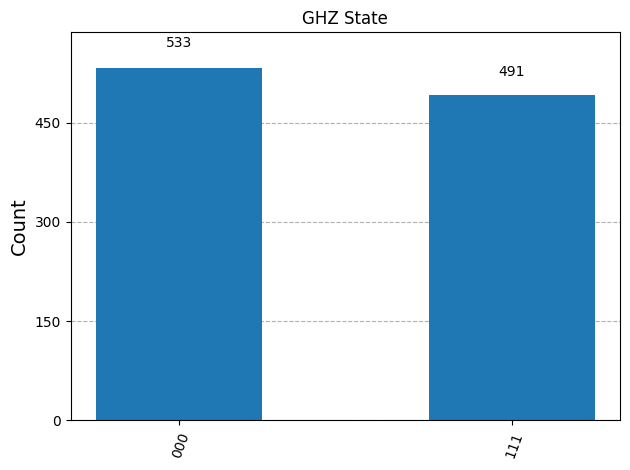

In [61]:
%matplotlib inline
import json
from qiskit import transpile, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def build_qiskit_circuit(ir):
    qubits = ir["qubits"]
    instructions = ir["instructions"]
    classical_bits = sorted(set(c for instr in instructions if instr["op"] == "measure" for c in instr.get("classical", [])))

    qc = QuantumCircuit(len(qubits), len(classical_bits))
    qmap = {q: i for i, q in enumerate(qubits)}
    cmap = {c: i for i, c in enumerate(classical_bits)}

    for instr in instructions:
        op = instr["op"]
        if op == "h":
            qc.h(qmap[instr["args"][0]])
        elif op == "cx":
            qc.cx(qmap[instr["args"][0]], qmap[instr["args"][1]])
        elif op == "measure":
            for q, c in zip(instr["qubits"], instr["classical"]):
                qc.measure(qmap[q], cmap[c])
    return qc, classical_bits

def simulate(ir_path, title):
    with open(ir_path) as f:
        ir = json.load(f)

    qc, classical_bits = build_qiskit_circuit(ir)
    sim = Aer.get_backend('aer_simulator')
    job = sim.run(transpile(qc, sim), shots=1024)
    result = job.result()
    counts = result.get_counts()

    print(f"\n--- {title} Simulation Results ---")
    print("Counts:", counts)
    print("Backend:", sim.name)
    print("Total time taken:", result.time_taken, "seconds")

    plot_histogram(counts, title=title)

if __name__ == "__main__":
    simulate("bell_ir.json", "Bell State")
    simulate("ghz_ir.json", "GHZ State")
